# Problem Identification

Predict who is most likely to have a bank account

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
#Read the csv file and extract the file name, remove the path extension
csvfilename = r"‪C:\Users\me\Downloads\Train_v2.csv"
csvfilename = csvfilename.strip('\u202a')#Remove invisible characters
basename=os.path.basename(csvfilename)
filenamex = os.path.splitext(basename)[0]
#Read csv file
finance = pd.read_csv(csvfilename, encoding = 'gbk')

In [3]:
finance.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
finance_test=pd.read_csv(r"C:\Users\me\Downloads\Test_v2.csv")

In [5]:
finance_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


# Data Wrangling

In [6]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
#checking for null entries
finance.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
#checking for duplicates
finance.duplicated().sum()

0

# Exploratory Data Analysis

In [9]:
financedf=pd.concat([finance,finance_test])

In [10]:
financedf

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,NaN,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,NaN,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,NaN,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,NaN,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


Univariate Analysis

In [11]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='bank_account', ylabel='count'>

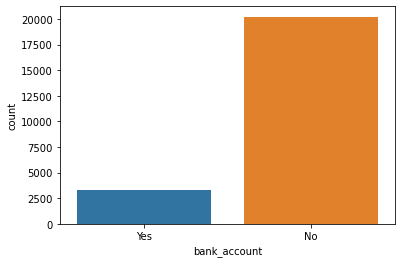

In [12]:
sns.countplot(financedf["bank_account"])

In [13]:
#Most of the participants didn't have bank accounts

<AxesSubplot:xlabel='country', ylabel='count'>

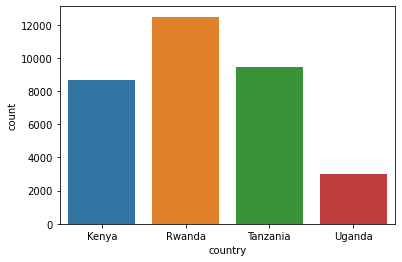

In [14]:
sns.countplot(financedf["country"])

In [15]:
#Most of the participants were Rwandese

<AxesSubplot:xlabel='location_type', ylabel='count'>

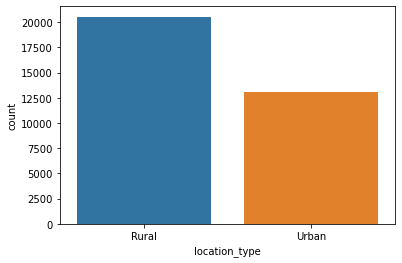

In [16]:
sns.countplot(financedf["location_type"])

In [17]:
#Majority of the participants reside in rural areas

<AxesSubplot:xlabel='cellphone_access', ylabel='count'>

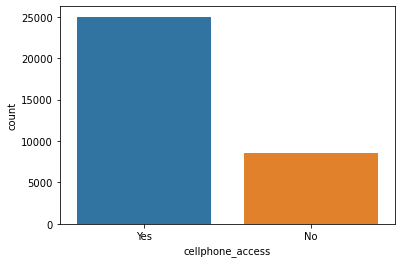

In [18]:
sns.countplot(financedf["cellphone_access"])

In [19]:
#Majority of the participants have access to a cellphone

<AxesSubplot:xlabel='gender_of_respondent', ylabel='count'>

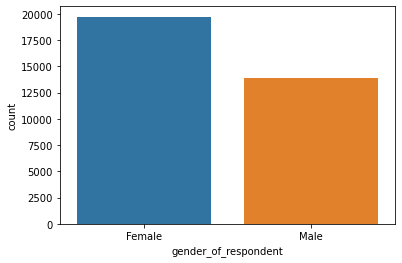

In [20]:
sns.countplot(financedf["gender_of_respondent"])

In [21]:
#Majority of the paticipants are female

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

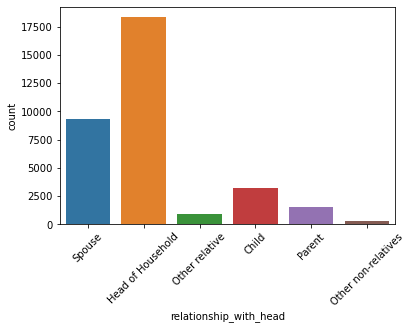

In [22]:
sns.countplot(financedf["relationship_with_head"])
plt.xticks(rotation=45)

In [23]:
#Majority of the participants are the head of their households

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

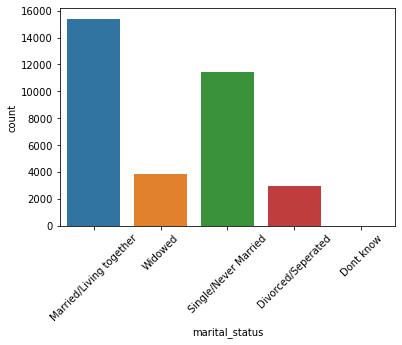

In [24]:
sns.countplot(financedf["marital_status"])
plt.xticks(rotation=45)

In [25]:
#Majority of the participants are married and living together with their spouses

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

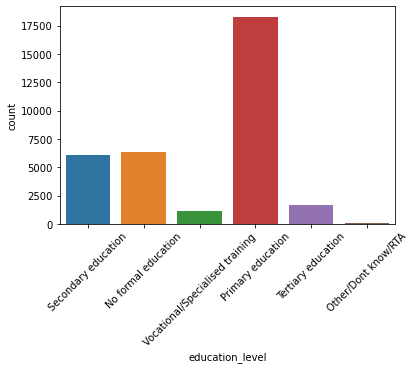

In [26]:
sns.countplot(financedf["education_level"])
plt.xticks(rotation=45)

In [27]:
#Most of the participants have vocational/specialised training

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

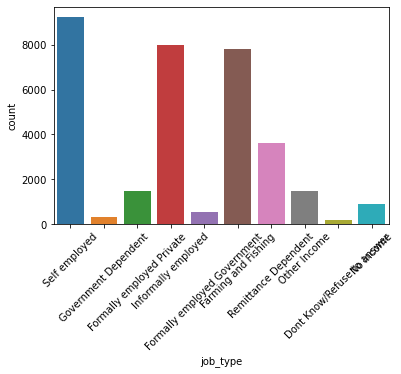

In [28]:
sns.countplot(financedf["job_type"])
plt.xticks(rotation=45)

In [29]:
#Majority of the participants are either selfemployed, formally employed in private sector or are formally employed by the government

<AxesSubplot:ylabel='Frequency'>

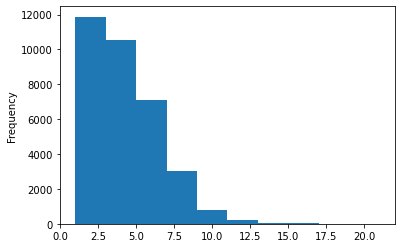

In [30]:
financedf['household_size'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

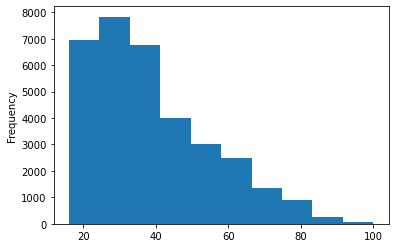

In [31]:
financedf['age_of_respondent'].plot.hist()

Bivariant Analysis

In [32]:
finance[['age_of_respondent','bank_account']].groupby('bank_account').mean()

,age_of_respondent
bank_account,
No,38.675292
Yes,39.598128


In [33]:
n=finance[['location_type','bank_account']].groupby('location_type')
n.get_group('Urban')

,location_type,bank_account
2,Urban,Yes
4,Urban,No
9,Urban,No
14,Urban,No
16,Urban,No
...,...,...
23513,Urban,No
23514,Urban,No
23516,Urban,No
23517,Urban,No


In [ ]:
(3312/23524 )*100

In [ ]:
finance[['age_of_respondent','bank_account']]

In [35]:
finance[['age_of_respondent','bank_account']].groupby('bank_account')

Multivariate Analysis

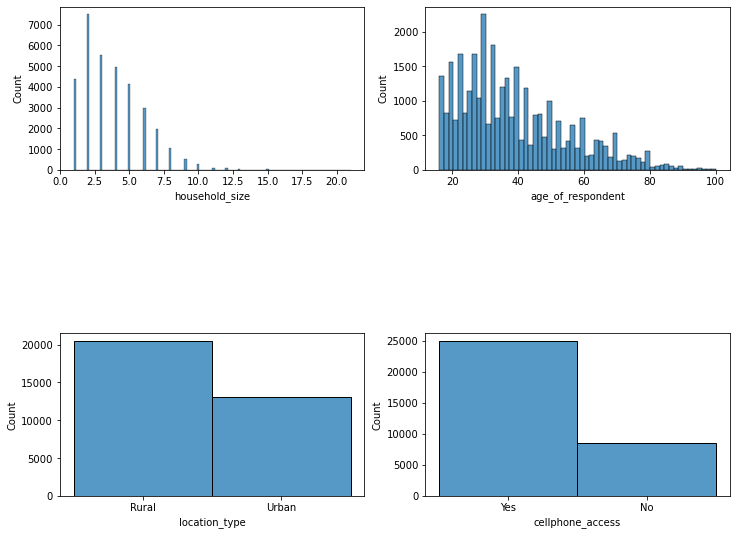

In [36]:
features = ["household_size", "age_of_respondent", "location_type", "cellphone_access"]
fig=plt.subplots(figsize=(12, 9))

for index,feature in enumerate(features):
    plt.subplot(2,2,index+1)
    plt.subplots_adjust(hspace=1.0)
    sns.histplot(x=financedf[feature])
  

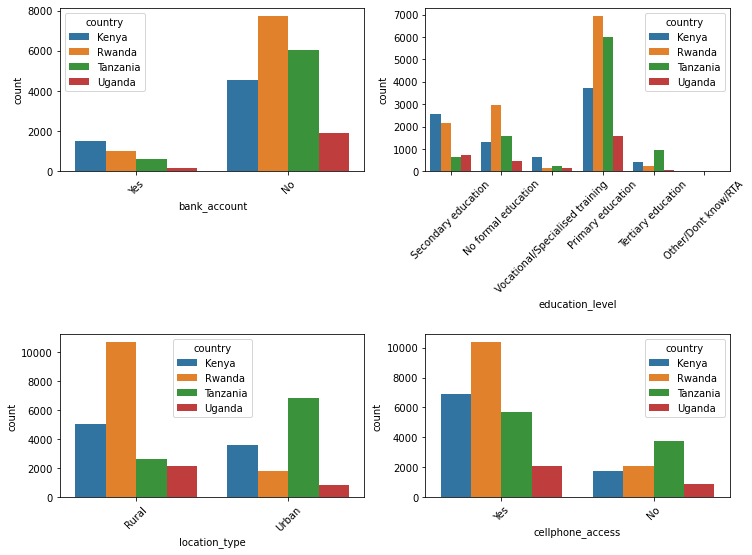

In [37]:
features = ["bank_account", "education_level", "location_type", "cellphone_access"]
fig=plt.subplots(figsize=(12, 9))

for index,feature in enumerate(features):
    plt.subplot(2,2,index+1)
    plt.subplots_adjust(hspace=1.0)
    plt.xticks(rotation=45)
    sns.countplot(data=financedf, x=feature, hue="country")

# Pre-processing and Training Data Development

In [38]:
financedf.drop(columns="bank_account", inplace=True)

In [39]:
financedf

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [40]:
country = pd.get_dummies(finance["country"],drop_first=True)

In [41]:
finance = pd.concat([finance, country], axis = 1)

In [42]:
country1= pd.get_dummies(finance_test["country"],drop_first=True)
finance_test = pd.concat([finance_test, country1], axis = 1)

rel= pd.get_dummies(finance["relationship_with_head"],drop_first=True)
rel1 = pd.get_dummies(finance_test["relationship_with_head"],drop_first=True)
finance = pd.concat([finance, rel], axis = 1)
finance_test = pd.concat([finance_test, rel1], axis = 1)

marital= pd.get_dummies(finance["marital_status"],drop_first=True)
marital1 = pd.get_dummies(finance_test["marital_status"],drop_first=True)
finance = pd.concat([finance,marital], axis = 1)
finance_test = pd.concat([finance_test, marital1], axis = 1)

edu= pd.get_dummies(finance["education_level"],drop_first=True)
edu1 = pd.get_dummies(finance_test["education_level"],drop_first=True)
finance = pd.concat([finance,edu], axis = 1)
finance_test = pd.concat([finance_test, edu1], axis = 1)

job= pd.get_dummies(finance["job_type"],drop_first=True)
job1 = pd.get_dummies(finance_test["job_type"],drop_first=True)
finance = pd.concat([finance,job], axis = 1)
finance_test = pd.concat([finance_test, job1], axis = 1)

finance.drop(['country',"relationship_with_head","marital_status","education_level","job_type"],axis=1,inplace=True)
finance_test.drop(['country',"relationship_with_head","marital_status","education_level","job_type"],axis=1,inplace=True)

In [43]:
finance.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,uniqueid_2,No,Rural,No,5,70,Female,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2018,uniqueid_4,No,Rural,Yes,5,34,Female,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,uniqueid_5,No,Urban,No,8,26,Male,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
finance_test.head()

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,Uganda,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,uniqueid_6056,Urban,Yes,3,30,Male,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,uniqueid_6060,Urban,Yes,7,51,Male,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2018,uniqueid_6065,Rural,No,3,77,Female,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,uniqueid_6072,Rural,No,6,39,Female,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,uniqueid_6073,Urban,No,3,16,Male,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le=LabelEncoder()
ms=MinMaxScaler()

scaler=["household_size","age_of_respondent"]
finance[scaler] = ms.fit_transform(finance[scaler])
finance_test[scaler] = ms.fit_transform(finance_test[scaler])


In [46]:
finance["bank_account"]=le.fit_transform(finance["bank_account"])
finance["location_type"] = le.fit_transform(finance["location_type"])
finance_test["location_type"] = le.fit_transform(finance_test["location_type"])
#finance_test["bank_account"] = le.fit_transform(finance_test["bank_account"])
finance["cellphone_access"] = le.fit_transform(finance["cellphone_access"])
finance_test["cellphone_access"] = le.fit_transform(finance_test["cellphone_access"])
finance["gender_of_respondent"] = le.fit_transform(finance["gender_of_respondent"])
finance_test["gender_of_respondent"] = le.fit_transform(finance_test["gender_of_respondent"])

In [47]:
finance.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,uniqueid_1,1,0,1,0.10,0.095238,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,uniqueid_2,0,0,0,0.20,0.642857,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,uniqueid_3,1,1,1,0.20,0.119048,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2018,uniqueid_4,0,0,1,0.20,0.214286,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,uniqueid_5,0,1,0,0.35,0.119048,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
finance_test.head()

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,Uganda,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,uniqueid_6056,1,1,0.105263,0.166667,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,uniqueid_6060,1,1,0.315789,0.416667,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2018,uniqueid_6065,0,0,0.105263,0.726190,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,uniqueid_6072,0,0,0.263158,0.273810,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,uniqueid_6073,1,0,0.105263,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
finance.drop(["year","uniqueid"],axis=1,inplace=True)
finance_test.drop(["year","uniqueid"],axis=1,inplace=True)

In [50]:
finance_test.head()

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,Uganda,Head of Household,Other non-relatives,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,1,1,0.105263,0.166667,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0.315789,0.416667,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0.105263,0.726190,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0.263158,0.273810,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0.105263,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
X=finance.drop("bank_account",axis=1)
y=finance["bank_account"]

In [52]:
X

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,Rwanda,Tanzania,Uganda,Head of Household,Other non-relatives,...,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,0,1,0.10,0.095238,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.20,0.642857,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0.20,0.119048,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0.20,0.214286,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0.35,0.119048,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,0,1,0.15,0.380952,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
23520,0,1,0.05,0.130952,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
23521,0,1,0.20,0.130952,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
23522,1,1,0.30,0.166667,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=100)

# Modelling

In [54]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [55]:
ypred=logmodel.predict(X_test)

In [56]:
from sklearn.metrics import*

In [57]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2995
           1       0.70      0.31      0.43       534

    accuracy                           0.88      3529
   macro avg       0.79      0.64      0.68      3529
weighted avg       0.86      0.88      0.85      3529



In [58]:
ypredict = logmodel.predict(finance_test)

In [59]:
ypredict

array([1, 1, 0, ..., 0, 0, 0])

In [60]:
csvfilename = r"‪C:\Users\me\Downloads\SubmissionFile.csv"
csvfilename = csvfilename.strip('\u202a')#Remove invisible characters
basename=os.path.basename(csvfilename)
filenamex = os.path.splitext(basename)[0]
#Read csv file
submission_file= pd.read_csv(csvfilename, encoding = 'gbk',index_col=None)

submission_file.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [61]:
#importing training models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import*
from sklearn.model_selection import KFold,cross_val_score

In [62]:
algorithms=[]
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()
algorithms.append(("LogisticRegression:",lr))
algorithms.append(("DecisionTreeClassifier:",dt))
algorithms.append(("RandomForestClassifier:",rf))
algorithms.append(("SVC:",svc))
algorithms.append(("KNN:",knn))
algorithms

[('LogisticRegression:', LogisticRegression()),
 ('DecisionTreeClassifier:', DecisionTreeClassifier()),
 ('RandomForestClassifier:', RandomForestClassifier()),
 ('SVC:', SVC()),
 ('KNN:', KNeighborsClassifier())]

In [63]:
#Getting accuracy scores
for i,model in algorithms:
    kf=KFold(n_splits=20)
    cv_score=cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kf)
    print(i,cv_score.mean()*100)

LogisticRegression: 88.65726226226226
DecisionTreeClassifier: 83.89594094094093
RandomForestClassifier: 86.87654154154154
SVC: 89.04727227227227
KNN: 87.91195695695697


In [64]:
submission_file["bank_account"] = ypredict

In [65]:
submission_file.to_csv("submission_Logistic.csv", index= False)

In [66]:
#Decision Tre
dt.fit(X_train,y_train)
ypred1=dt.predict(X_test)

In [67]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2995
           1       0.42      0.38      0.40       534

    accuracy                           0.83      3529
   macro avg       0.65      0.64      0.65      3529
weighted avg       0.82      0.83      0.82      3529



In [68]:
ypredict1 = dt.predict(finance_test)

In [69]:
submission_file["bank_account"] = ypredict1
submission_file.to_csv("submission_DecisionTree.csv", index= False)

In [70]:
#Random Forest
rf.fit(X_train,y_train)
ypred2=rf.predict(X_test)

In [71]:
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2995
           1       0.56      0.37      0.44       534

    accuracy                           0.86      3529
   macro avg       0.73      0.66      0.68      3529
weighted avg       0.84      0.86      0.85      3529



In [72]:
ypredict2 = rf.predict(finance_test)

In [73]:
submission_file["bank_account"] = ypredict2
submission_file.to_csv("submission_RandomForest.csv", index= False)

In [74]:
#KNN
knn.fit(X_train,y_train)
ypred3=knn.predict(X_test)

In [75]:
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2995
           1       0.61      0.34      0.44       534

    accuracy                           0.87      3529
   macro avg       0.75      0.65      0.68      3529
weighted avg       0.85      0.87      0.85      3529



In [76]:
ypredict3 = knn.predict(finance_test)

In [77]:
submission_file["bank_account"] = ypredict3
submission_file.to_csv("submission_KNN.csv", index= False)

In [79]:
#SVC
svc.fit(X_train,y_train)
ypred4=svc.predict(X_test)

In [80]:
print(classification_report(y_test,ypred4))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2995
           1       0.75      0.29      0.42       534

    accuracy                           0.88      3529
   macro avg       0.82      0.64      0.67      3529
weighted avg       0.86      0.88      0.85      3529



In [81]:
ypredict4 = svc.predict(finance_test)

In [83]:
submission_file["bank_account"] = ypredict1
submission_file.to_csv("submission_svc.csv", index= False)